<a href="https://colab.research.google.com/github/KirvelPasha/data-science/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import model_selection, datasets, linear_model, metrics 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
circles = datasets.make_circles()

colors = ListedColormap(['red', 'yellow'])
value1 = list(map(lambda x: x[0], circles[0]))
value2 = list(map(lambda x: x[1], circles[0]))

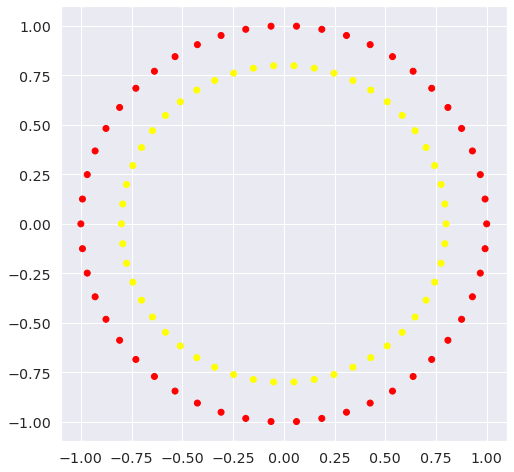

In [ ]:
pyplot.figure(figsize(8, 8))
pyplot.scatter(value1, value2, c=circles[1], cmap=colors);

In [ ]:
def plot(data, colors):
  value1 = list(map(lambda x: x[0], data[0]))
  value2 = list(map(lambda x: x[1], data[0]))
  pyplot.figure(figsize(8, 8))
  pyplot.scatter(value1, value2, c=data[1], cmap=colors);

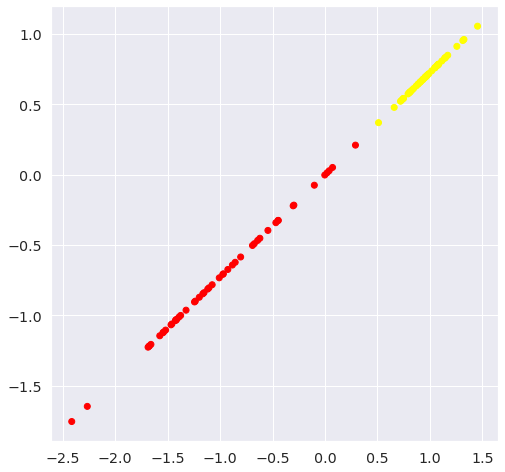

In [ ]:
simple_classification = datasets.make_classification(n_features = 2, n_informative = 1, 
                                                    n_redundant = 1, n_clusters_per_class = 1, 
                                                    random_state = 1)
plot(simple_classification, colors)

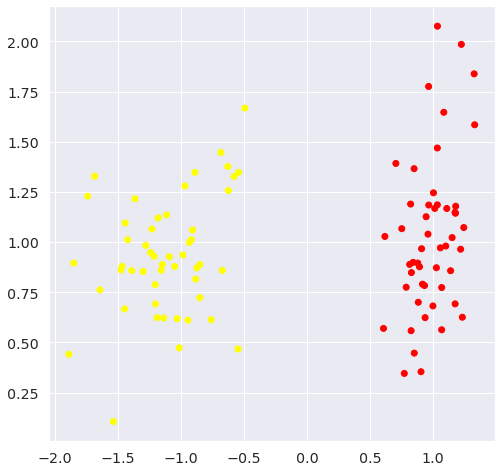

In [ ]:
simple_classification2 = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 1)

colorNew = ListedColormap(['red', 'blue', 'green', 'yellow'])
plot(simple_classification2, colorNew)

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print('Featue names: {}'.format(iris.feature_names)) # имена призанокв
print('Target names: {}'.format(iris.target_names)) # имена  классов

Featue names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
iris.target #целевая переменная 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris_frame = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_frame['target'] = iris.target
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_frame.target = iris_frame.target.apply(lambda x: iris.target_names[x])
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
[(wine_data['Wine'] == 1) & (wine_data['Alcohol'] >= 13.19)]

In [ ]:
value = iris_frame.loc[(iris_frame['target'] == 'setosa') & (iris_frame['sepal length (cm)'] == iris_frame['sepal length (cm)'].max())]
print(value.shape)

(0, 5)


In [ ]:
iris_frame[iris_frame['target'] == 'setosa']['sepal length (cm)'].value_counts().sum()

50

In [ ]:
iris_frame[iris_frame['sepal length (cm)'] == iris_frame['sepal length (cm)'].max()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
131,7.9,3.8,6.4,2.0,virginica


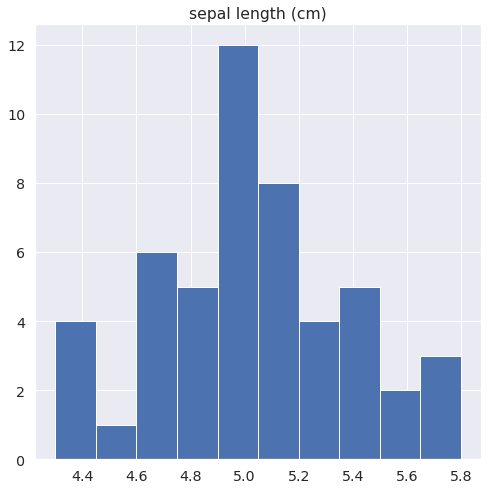

In [ ]:
iris_frame[iris_frame.target == 'setosa'].hist('sepal length (cm)');

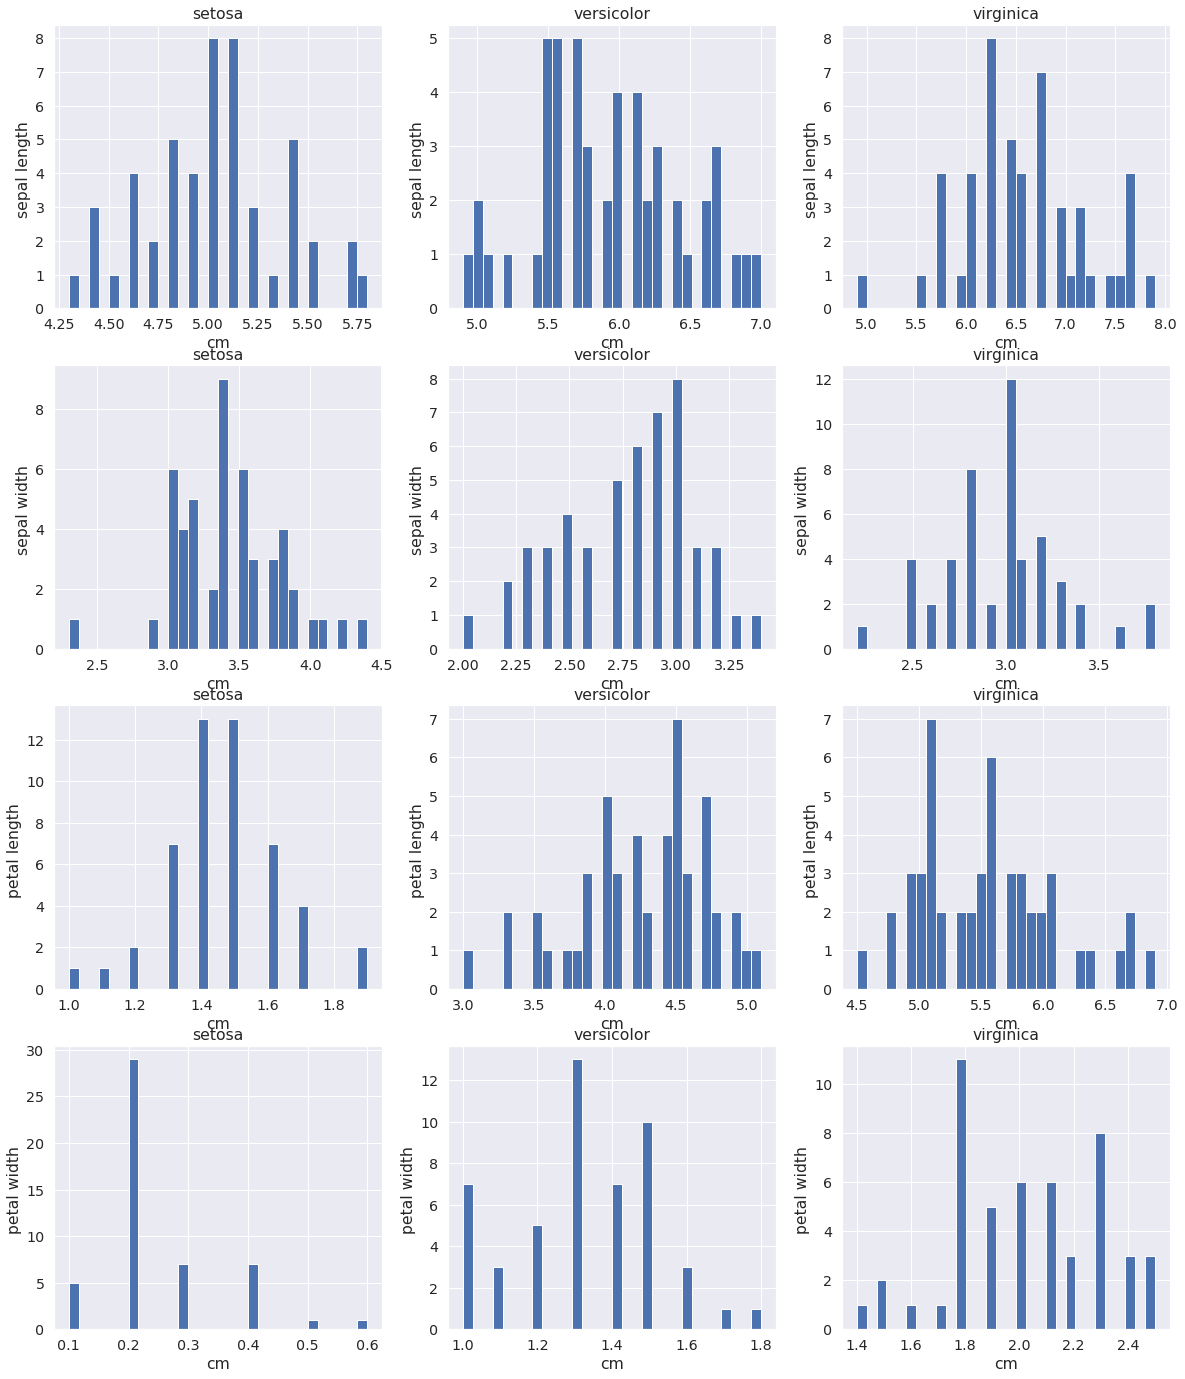

In [ ]:
pyplot.figure(figsize(20, 24))
plot_number = 0
for feature_name in iris['feature_names']:
  for target_name in iris['target_names']:
    plot_number = plot_number + 1
    pyplot.subplot(len(iris['feature_names']), len(iris['target_names']), plot_number)
    pyplot.hist(iris_frame[iris_frame.target == target_name][feature_name], bins=30)
    pyplot.title(target_name)
    pyplot.xlabel('cm')
    pyplot.ylabel(feature_name[:-4])

In [ ]:
import seaborn as sns

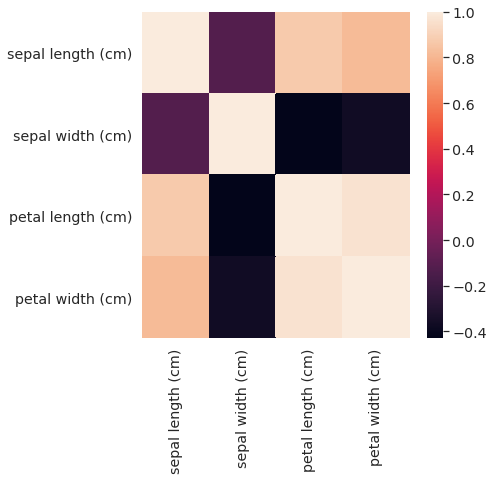

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(iris_frame.corr());

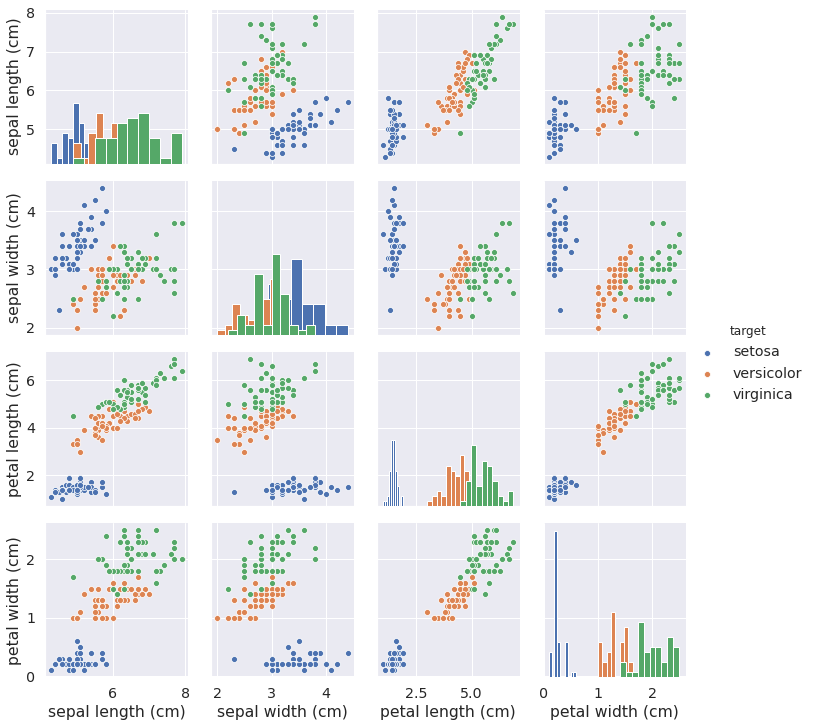

In [ ]:
sns.pairplot(iris_frame, hue='target', diag_kind='hist');

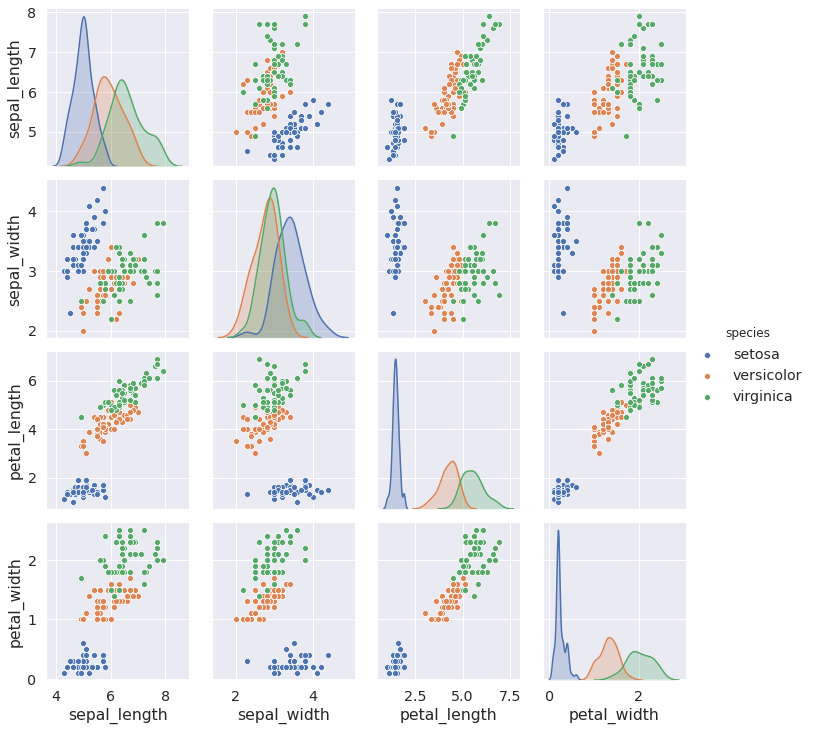

In [ ]:
sns.set(font_scale=1.3)
data = sns.load_dataset('iris')
sns.pairplot(data, hue='species');